In [34]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image

image_data = []
lable_data=[]

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        img_path = os.path.join(dirname, filename)
        img = Image.open(img_path)
        
        # Convert the image to a numpy array
        img_array = np.array(img)
        
        #Normalized
        normalized=img_array/255
        
        #flatten
        flattened=normalized.flatten()

        # Append the numpy array to the list
        image_data.append(flattened)
        
        #Append the label to the list
        if dirname[-1]=='2':
            lable_data.append(0)
        if dirname[-1]=='3':
            lable_data.append(1)
        if dirname[-1]=='7':
            lable_data.append(2)
        if dirname[-1]=='S':
            lable_data.append(3)
        if dirname[-1]=='W':
            lable_data.append(4)
        




In [35]:
image_data=np.array(image_data)
lable_data=np.array(lable_data)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, lable_data, test_size=0.2, random_state=42)

In [37]:
class_labels=['2','3','7','S','W']

In [38]:
print(X_test.shape)
print(X_train.shape)

(300, 256)
(1200, 256)


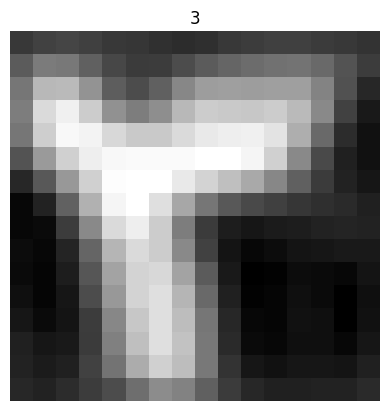

(16, 16)


In [40]:
import matplotlib.pyplot as plt
import random

# Choose a random index
random_index = random.randint(0, len(X_train) - 1)

# Get the corresponding image and label
random_image = X_train[random_index]
random_label = y_train[random_index]
random_image=random_image.reshape(16,16)
# Display the image
plt.imshow(random_image, cmap='gray')
plt.title(f"{class_labels[random_label]}")
plt.axis('off')  # Hide axes
plt.show()
print(random_image.shape)


In [44]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm_linear = svm.SVC(kernel='linear')

# Train the classifier
svm_linear.fit(X_train, y_train)



# Predict on the test set
y_test_pred = svm_linear.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 97.33%


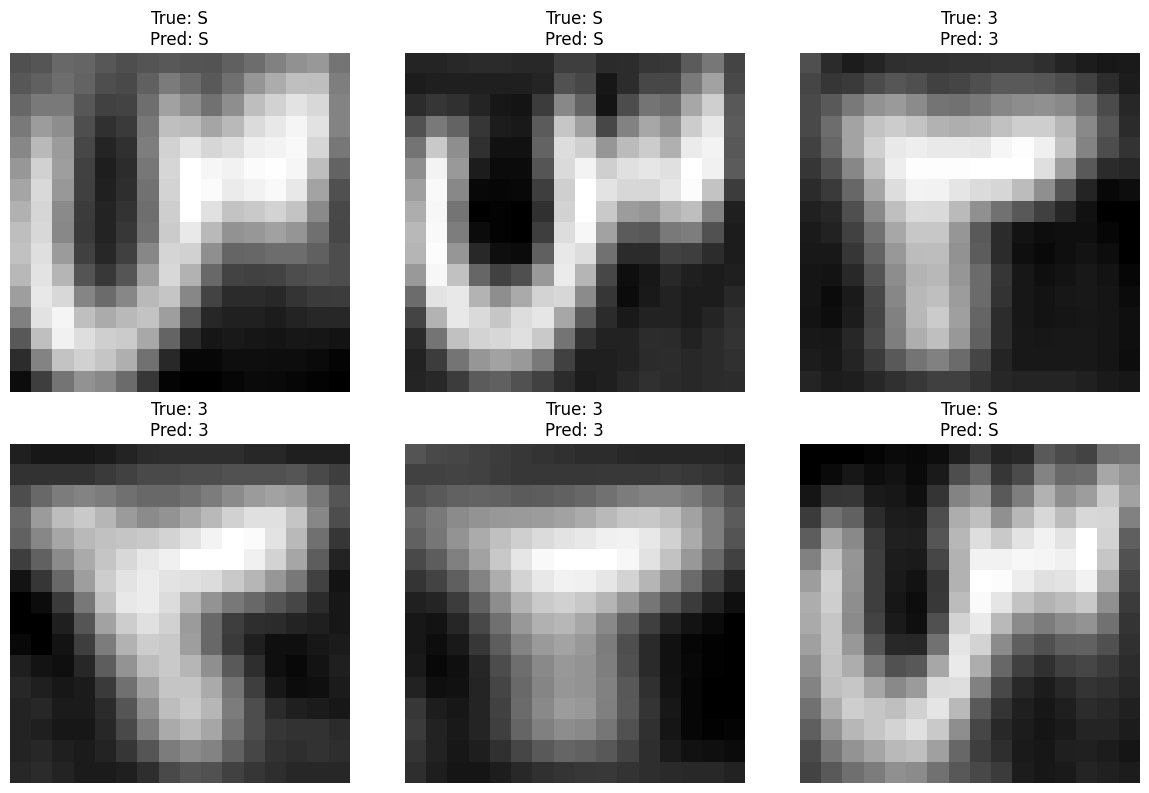

In [47]:
import numpy as np

sample_indices  = np.random.randint(0, 300, size=6)

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, idx in enumerate(sample_indices):
    # Get the image, true label, and predicted label
    image = X_test[idx]
    true_label = y_test[idx]
    predicted_label = y_test_pred[idx]

    # Display the image
    image=image.reshape( 16,16)
    axs[i // 3, i % 3].imshow(image, cmap='gray')
    axs[i // 3, i % 3].set_title(f"True: {class_labels[true_label]}\nPred: {class_labels[predicted_label]}")
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()

In [49]:
# Initialize the SVM classifier
svm_poly = svm.SVC(kernel='poly')

# Train the classifier
svm_poly.fit(X_train, y_train)



# Predict on the test set
y_test_pred = svm_poly.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 97.00%


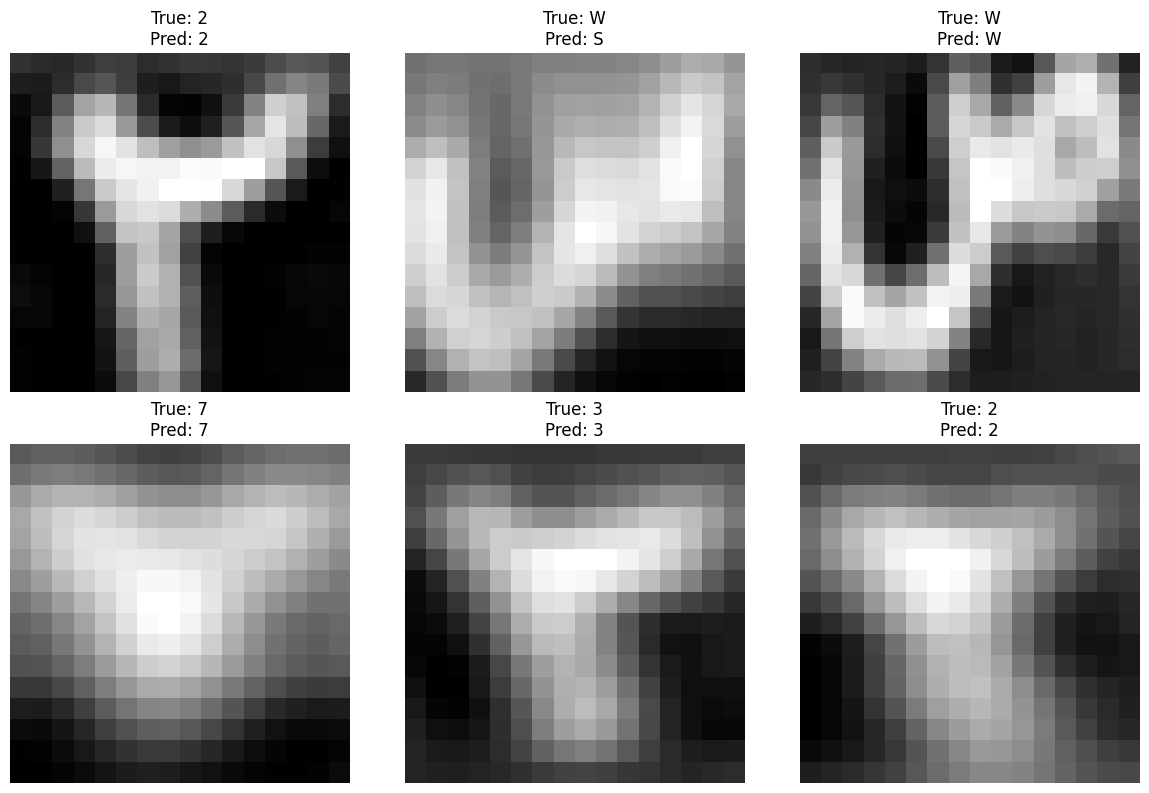

In [50]:
import numpy as np

sample_indices  = np.random.randint(0, 300, size=6)

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, idx in enumerate(sample_indices):
    # Get the image, true label, and predicted label
    image = X_test[idx]
    true_label = y_test[idx]
    predicted_label = y_test_pred[idx]

    # Display the image
    image=image.reshape( 16,16)
    axs[i // 3, i % 3].imshow(image, cmap='gray')
    axs[i // 3, i % 3].set_title(f"True: {class_labels[true_label]}\nPred: {class_labels[predicted_label]}")
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()

In [52]:
# Initialize the SVM classifier
svm_rbf = svm.SVC(kernel='rbf',C=10)

# Train the classifier
svm_rbf.fit(X_train, y_train)



# Predict on the test set
y_test_pred = svm_rbf.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 97.00%


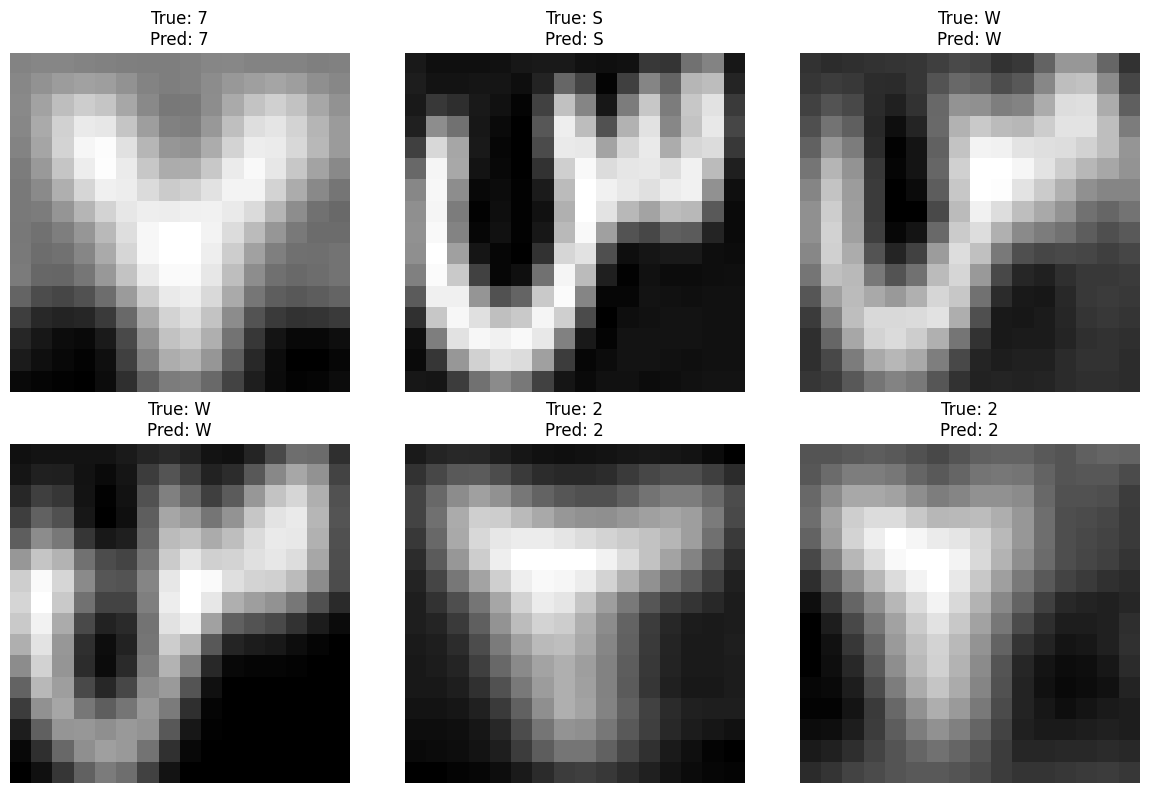

In [53]:
import numpy as np

sample_indices  = np.random.randint(0, 300, size=6)

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, idx in enumerate(sample_indices):
    # Get the image, true label, and predicted label
    image = X_test[idx]
    true_label = y_test[idx]
    predicted_label = y_test_pred[idx]

    # Display the image
    image=image.reshape( 16,16)
    axs[i // 3, i % 3].imshow(image, cmap='gray')
    axs[i // 3, i % 3].set_title(f"True: {class_labels[true_label]}\nPred: {class_labels[predicted_label]}")
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score



# Combine the train and test sets
X = np.concatenate((X_train, X_test))
Y = np.concatenate((y_train, y_test))

# Perform cross-validation
scores = cross_val_score(svm_linear, X, Y, cv=5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')


Cross-validation scores: [0.95       0.95666667 0.97666667 0.97333333 0.96      ]
Average cross-validation score: 0.9633333333333333
